# Q1
Write a Python code that will do the following
A. Read any gray scale image.
B. Display that image.
C. Reads a gray scale image and generates the flipped image of original image.
D. Again display the image such that the pixels having intensity values below than 50 will display as black and pixels
having intensity values above than 150 will display as white. And the pixels between these will display as it is.

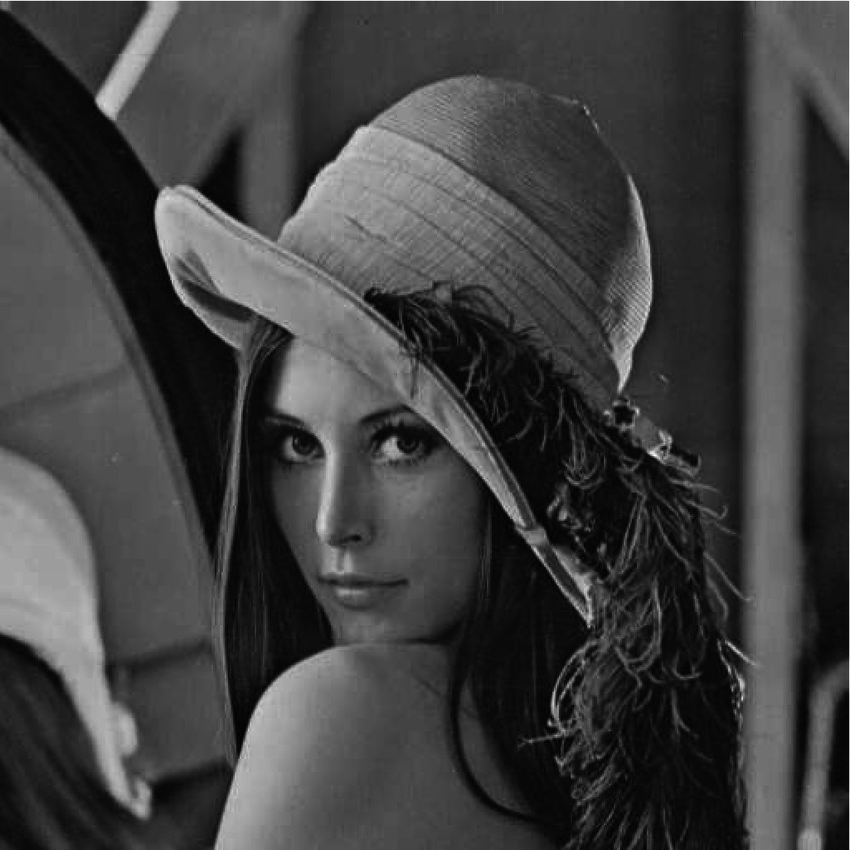

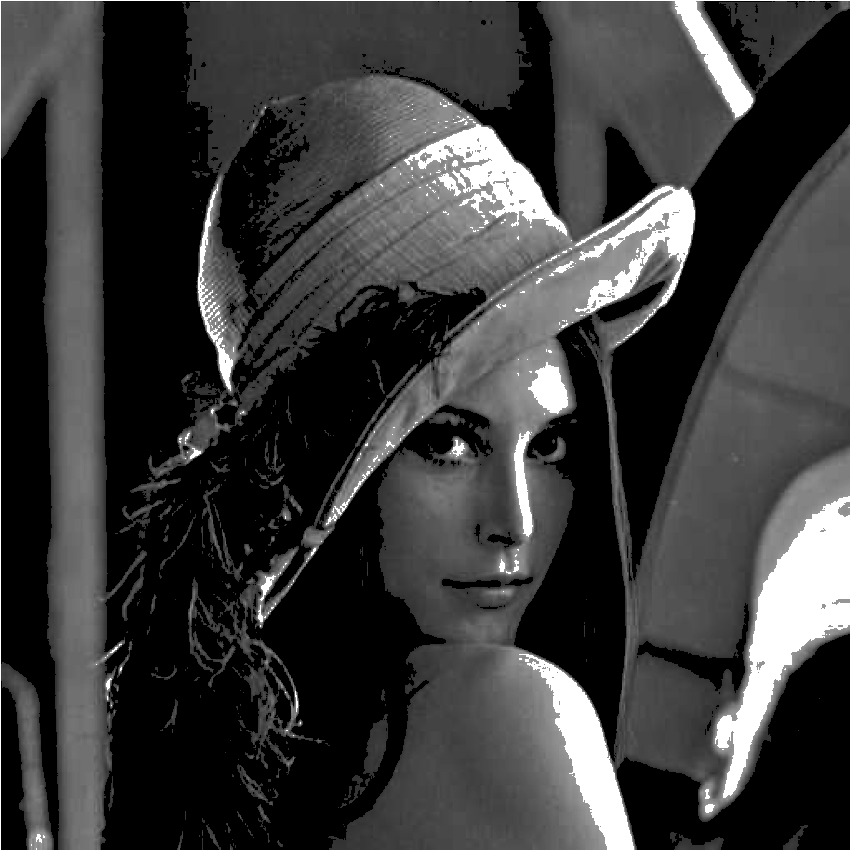

In [2]:
import PIL
from PIL import Image
loc="lena.jpeg"
img=Image.open(loc)
#display(img)
flip_img = img.transpose(Image.FLIP_LEFT_RIGHT)
display(flip_img)
img2=img
width,height=img.size
for i in range(height):
    for j in range(width):
        r,g,b=img2.getpixel((j,i))
        if r<50:
            img2.putpixel((j,i),(0,0,0))
        elif r>150:
            img2.putpixel((j,i),(255,255,255))
display(img2)

# Q2
Imagine that we have an image with pixels like below. Write an appropriate code to show the histogram
representation of the provided image.
87  90   1
 1  89  89
87 120 120
88 100  90
 2  88  88
 2  90  90

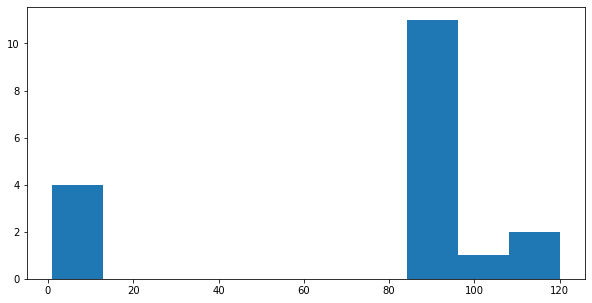

In [3]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
img=[[87,  90,  1],
 [1,  89,  89],
[87, 120, 120],
[88, 100,  90],
 [2,  88,  88],
 [2,  90,  90]]
a=list(np.concatenate(img).flat)
fig, ax = plt.subplots(figsize =(10, 5))
ax.hist(a)
plt.show()
# a = np.array([87,  90,   1,
#  1,  89,  89,
# 87, 120, 120,
# 88, 100,  90,
#  2,  88,  88,
#  2,  90,  90])
# for i in range(len(img)):
#     for j in range(len(img[0])):
#         m=min(img[i][j],m)
#         M=max(img[i][j],M)
# arr=[]*(256)
# for i in range(len(img)):
#     for j in range(len(img[0])):
#         arr[img[i][j]]++


# Q3
write a program to Perform contrast stretching on the following image of a woman's face (Figure-1):

Figure-1

Record the values of a, b, c, d used for the operation. Now perform histogram equalization
on the original image. Compare the original picture and its histogram with the stretched
picture and its histogram as well as with the equalized picture and its histogram.
Note: For 8-bit graylevel images the lower and upper limits might be a=0 and b=255. c and
d the lowest and highest pixel values currently present in the image.
Hint: Pout = (Pin − C) (b−a/d−c)+a and Values below 0 are set to 0 and values about 255 are

set to 255.

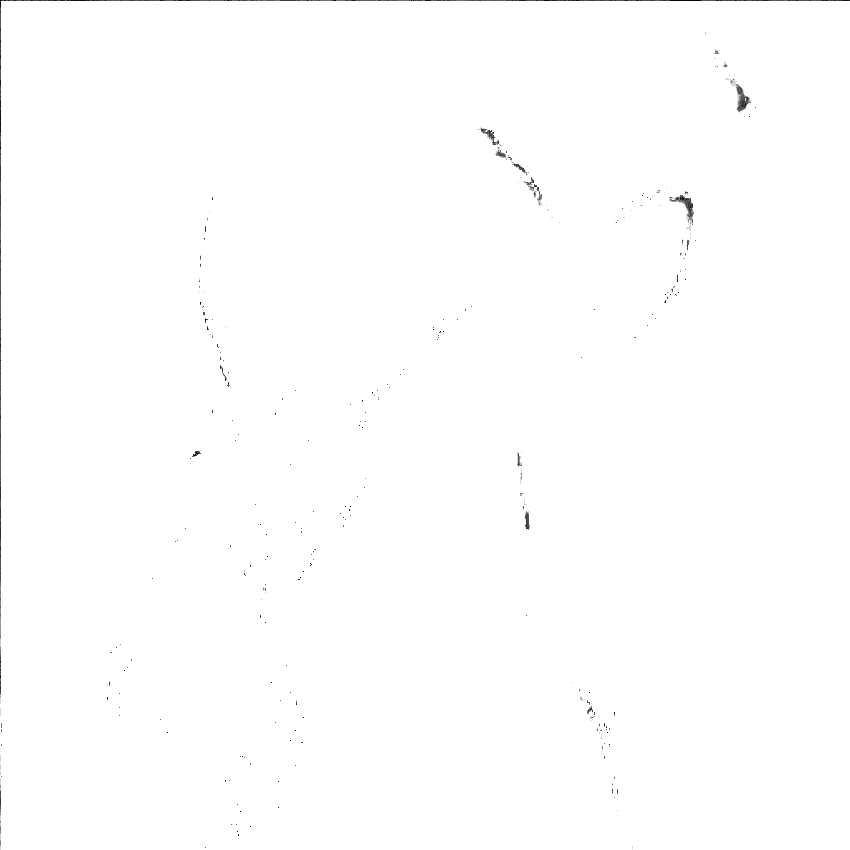

In [6]:
image = Image.open("lena.jpeg")
res= PIL.Image.new(image.mode, image.size)
mmax=0
mmin=255
for i in range(image.width):
    for j in range(image.height):
        mmax=max(image.getpixel((j,i))[0],mmax)
        mmin=min(image.getpixel((j,i))[0],mmin)
#         if image.getpixel((j,i))[0]>mmax:
#             mmax = image.getpixel((j,i))[0]
#         if image.getpixel((j,i))[0]<mmin:
#             mmin = image.getpixel((j,i))[0]
lmin = 0
lmax = 255
ldiff = lmax - lmin
mdiff = mmax - mmin

frequency = np.zeros(lmax+1)
for y in range(image.width):
    for x in range(image.height):
        frequency[image.getpixel((y,x))[0]]+=1


lval = np.zeros(lmax+1)
 
for i in range(lmax+1):
    val = round(((ldiff*(i-mmin))/mdiff) + lmin)
    if(val>255):
        lval[i] = 255
    elif (val<0):
        lval[i] = 0
    else: lval[i] = val
 
new_freq = np.zeros(lmax+1)
m_map = np.zeros(lmax+1)

for i in range(lmax+1):
    m_map[int(lval[i])]+= frequency[i] 

for i in range(lmax+1):
    new_freq[i] += m_map[i]

for j in range(image.width):
    for i in range(image.height):
        value = int(round(new_freq[image.getpixel((j,i))[0]]))
        res.putpixel((j,i),(value,value,value))
display(res)

# Q4
Image splitting and shifting

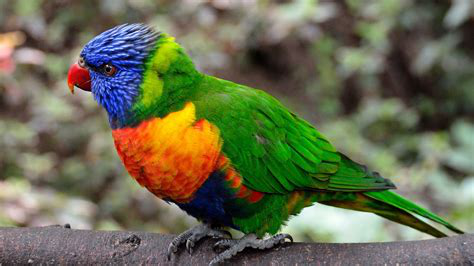

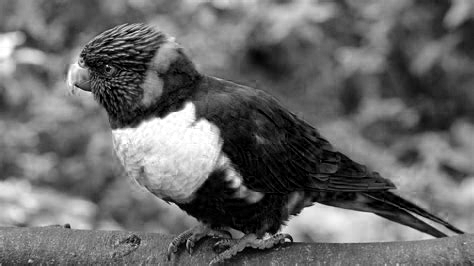

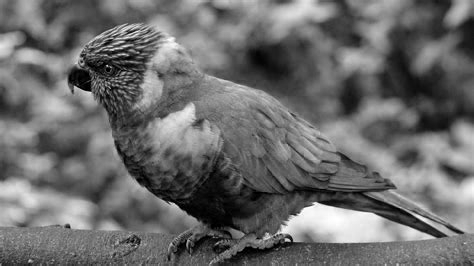

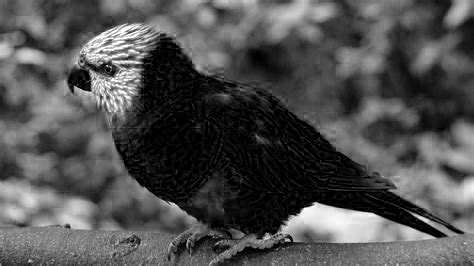

In [4]:
loc="parrot.jpeg"
img=Image.open(loc)
display(img)

img1=PIL.Image.new(img.mode, img.size)
img2=PIL.Image.new(img.mode, img.size)
img3=PIL.Image.new(img.mode, img.size)

width,height=img.size
for i in range(height):
    for j in range(width):
        r,g,b=img.getpixel((j,i))
        img1.putpixel((j,i),(r,r,r))
        img2.putpixel((j,i),(g,g,g))
        img3.putpixel((j,i),(b,b,b))
display(img1)
display(img2)
display(img3)

# Q5
Image Negative

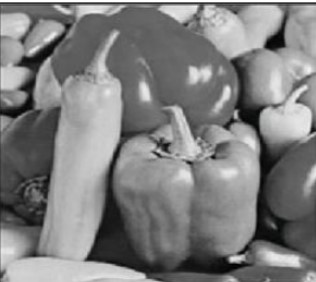

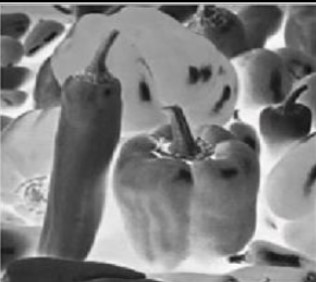

In [5]:
loc="veggies.jpg"
img=Image.open(loc)
display(img)

img1=img
width,height=img.size
for i in range(height):
    for j in range(width):
        r,g,b=img.getpixel((j,i))
        img1.putpixel((j,i),(255-r,255-g,255-b))
display(img1)

# Q6
Threshold of an image

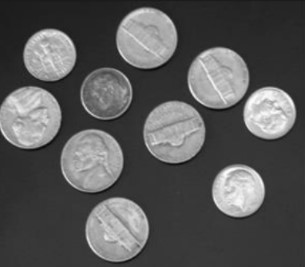

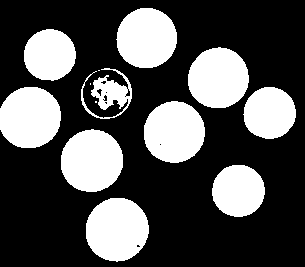

In [6]:
loc="coins.jpg"
img=Image.open(loc)
display(img)

img1=img
width,height=img.size
for i in range(height):
    for j in range(width):
        r,g,b=img1.getpixel((j,i))
        if r<=115:
            img1.putpixel((j,i),(0,0,0))
        elif r>115:
            img1.putpixel((j,i),(255,255,255))
display(img1)

# Q7a
Bit plane slicing

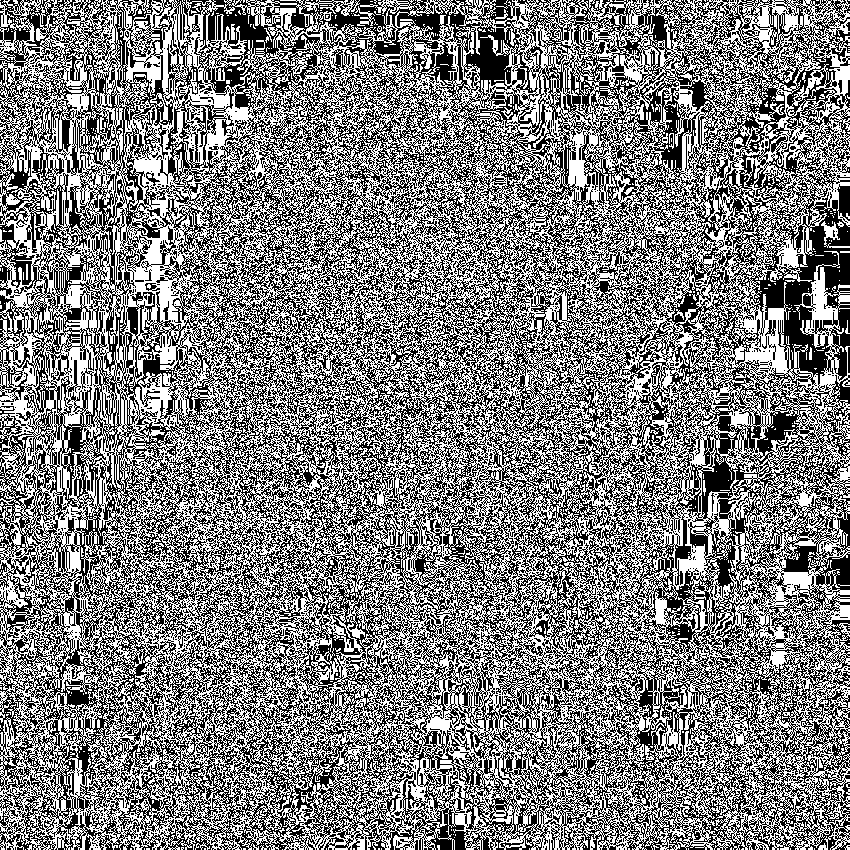

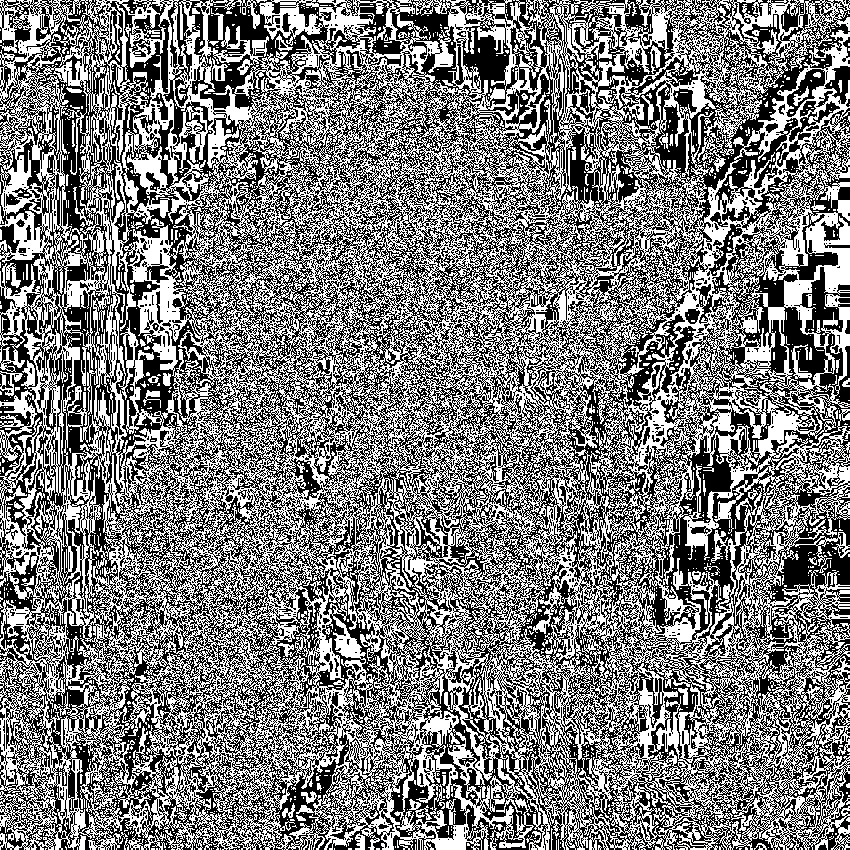

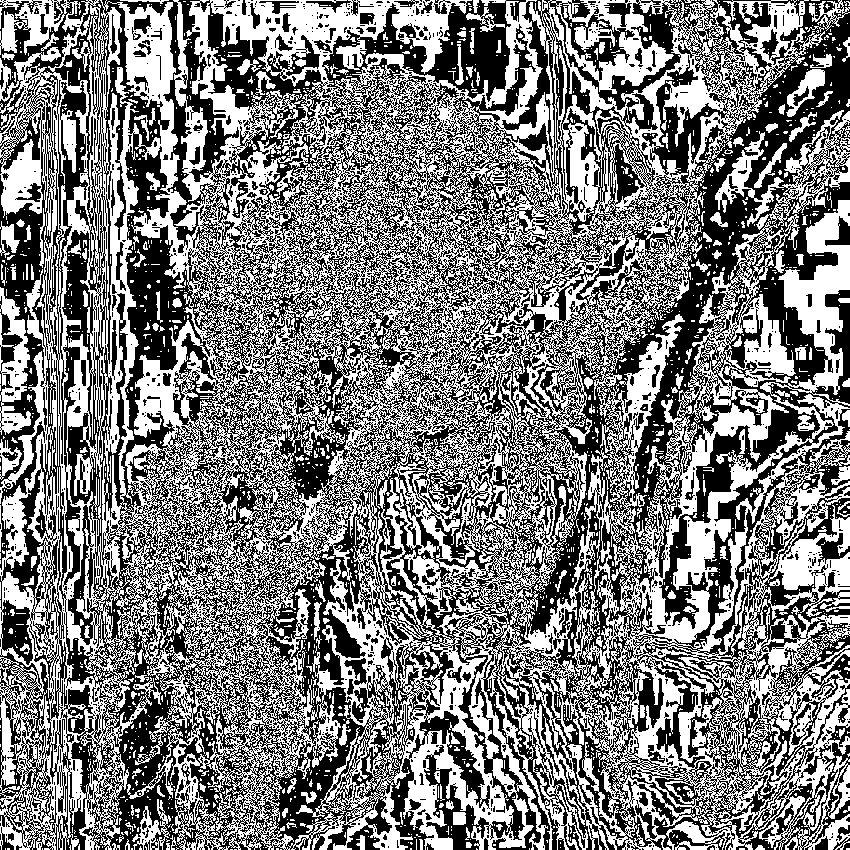

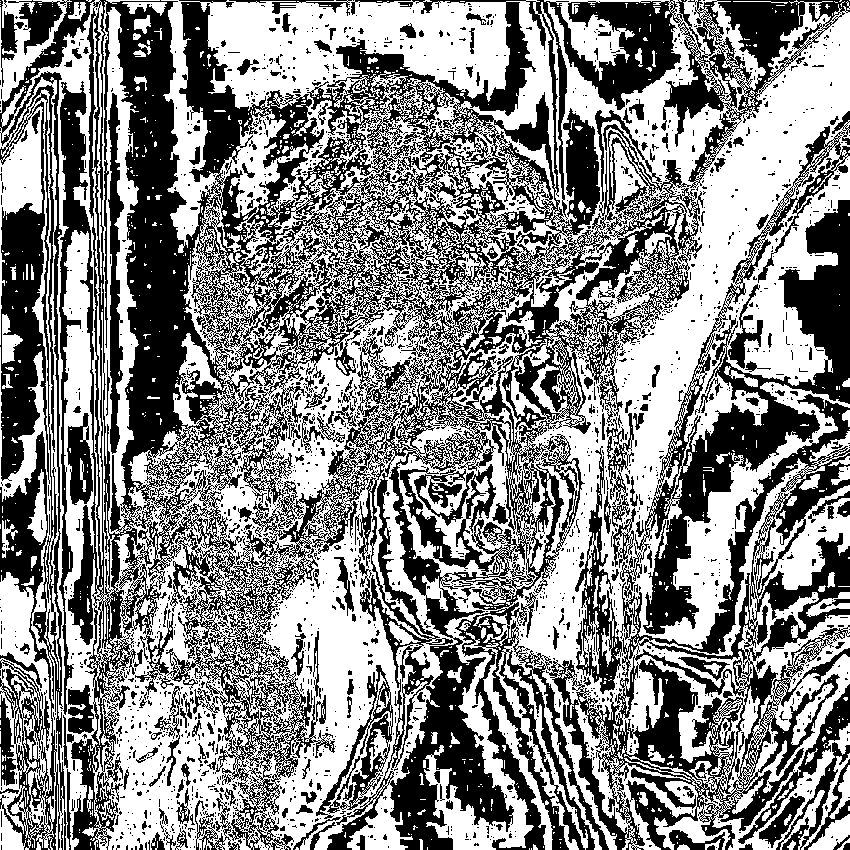

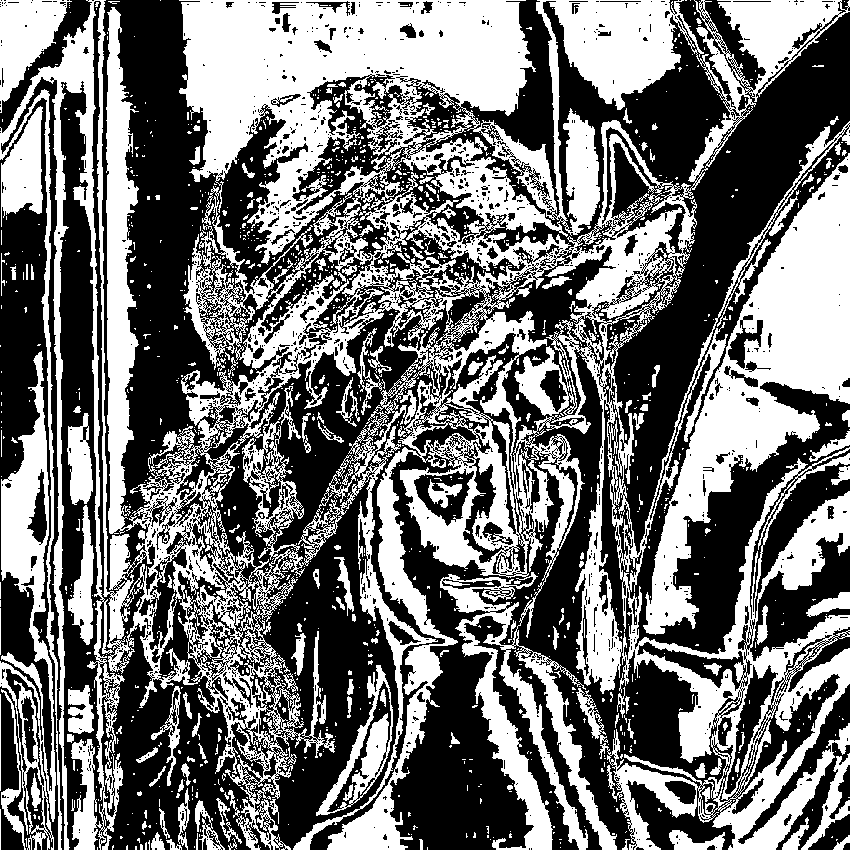

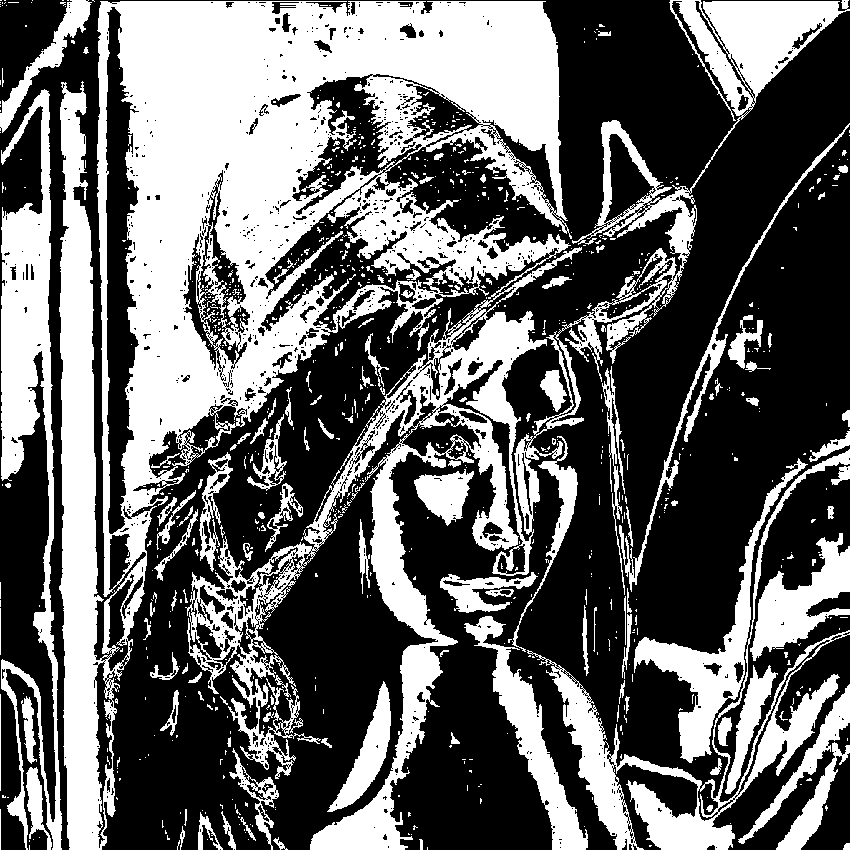

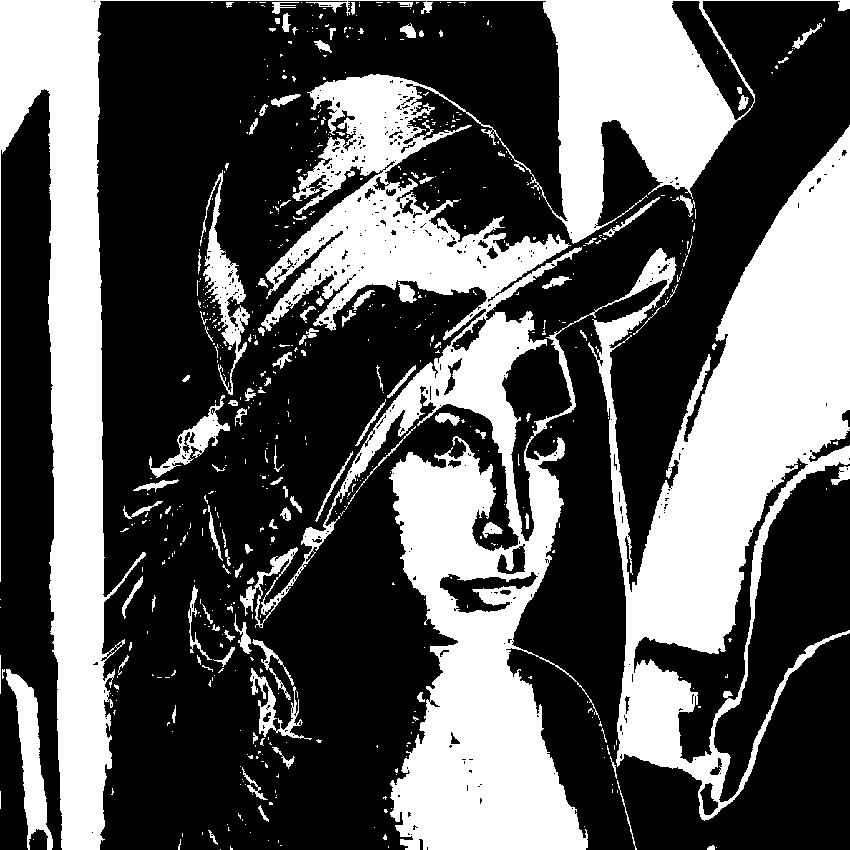

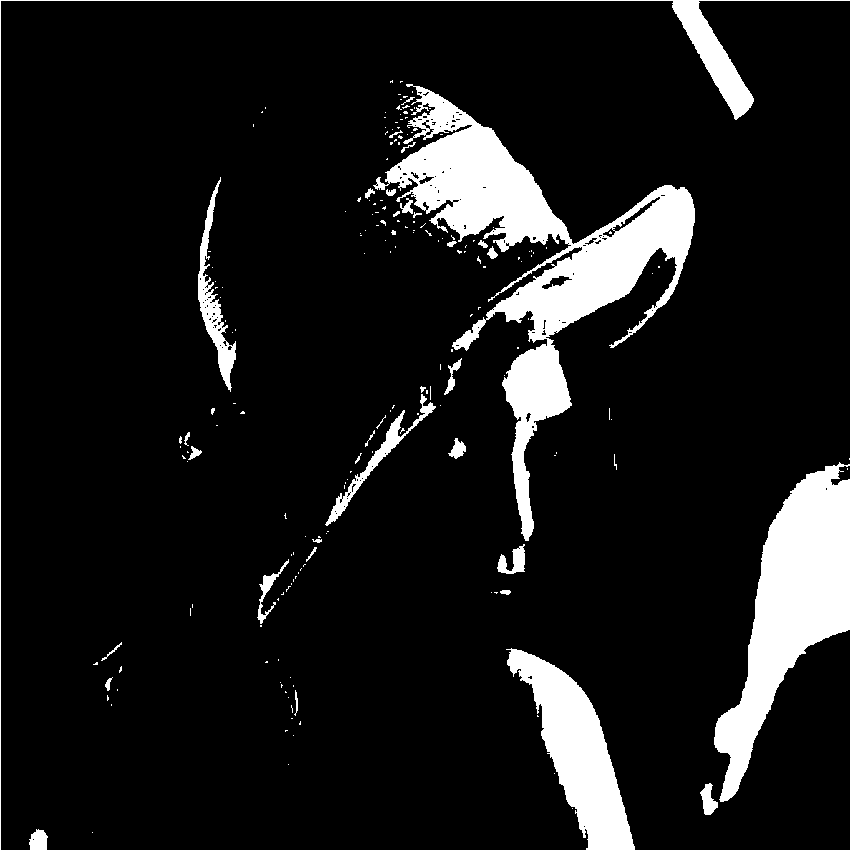

In [7]:
loc="lena.jpeg"
img=Image.open(loc)
#display(img)
planes=[]
width,height=img.size
for k in range(8):
    plane=PIL.Image.new(img.mode, img.size)
    for i in range(height):
        for j in range(width):
            r=img.getpixel((j,i))[0]
            num=r>>k
            if ((num&1)!=0):
                plane.putpixel((j,i),(255,255,255))
            else:
                plane.putpixel((j,i),(0,0,0))
    planes.append(plane)
for i in range(8):
    display(planes[i])

# Q7b
Reconstruction

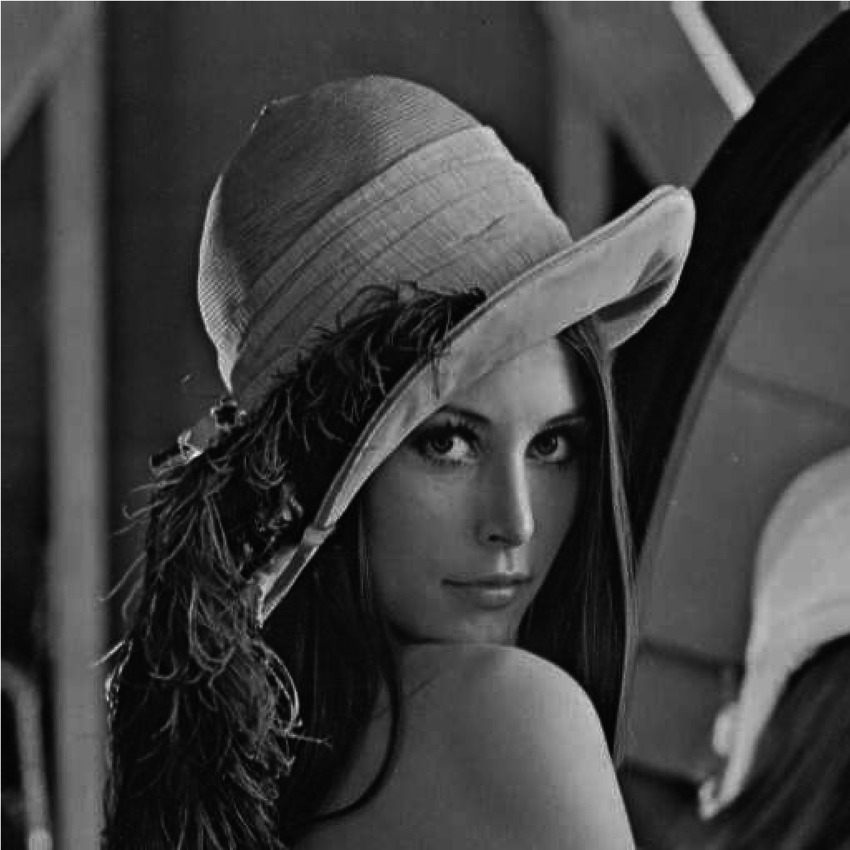

In [8]:
final=PIL.Image.new(img.mode, img.size)
width,height=img.size

for k in range(8):
    for i in range(height):
        for j in range(width):
            x=final.getpixel((j,i))[0]
            y=planes[k].getpixel((j,i))[0]
            if ((y&1)==1):
                x=(x+pow(2,k))
            final.putpixel((j,i),(x,x,x))
display(final)

# Q8

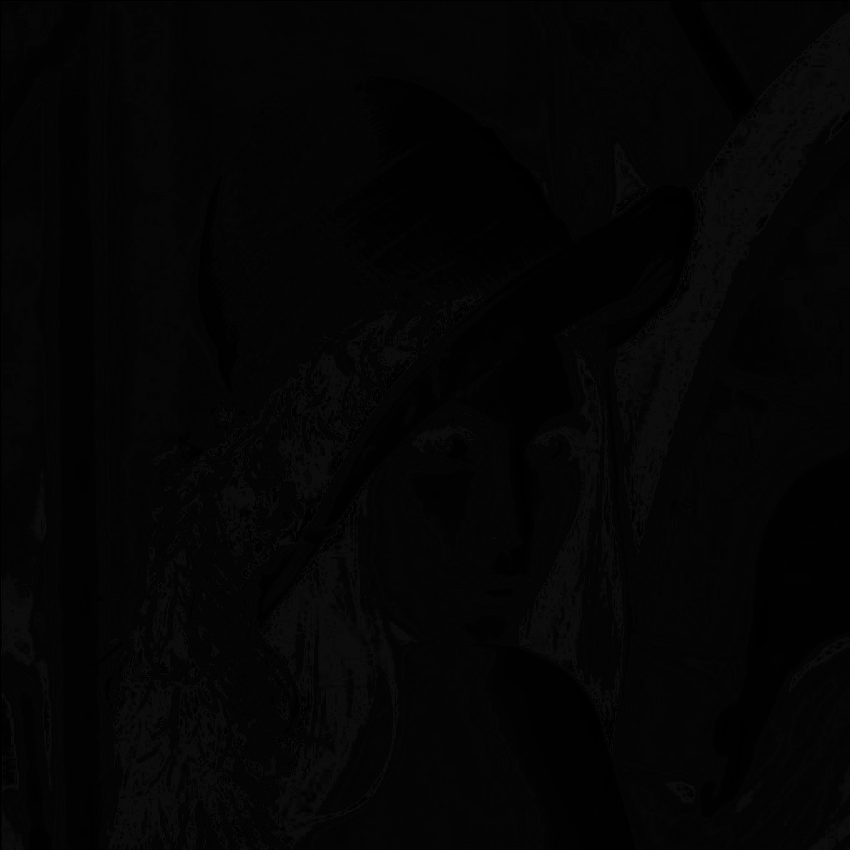

In [9]:
max = 0
total = 0
hiseq = PIL.Image.new(image.mode, image.size)
for y in range(image.width):
    for x in range(image.height):
        if image.getpixel((y,x))[0]>max:
            max = image.getpixel((y,x))[0]

newfrequency = np.zeros(max+1)

for y in range(image.width):
    for x in range(image.height):
        newfrequency[image.getpixel((y,x))[0]] = newfrequency[image.getpixel((y,x))[0]] + 1
        total = total+1

probability = np.zeros(max+1)

for i in range(max+1):
    probability[i] = newfrequency[i]/total


cumprob = np.zeros(max+1)
roundoff = np.zeros(max+1)
for i in range(max+1):
    if(i == 0):
        cumprob[i] = probability[i]
        continue
    cumprob[i] = probability[i-1] + probability[i]
    temp1 = cumprob[i] * max
    temp1 = round(temp1)
    roundoff[i] = temp1

for y in range(image.width):
    for x in range(image.height):
        value = int(roundoff[image.getpixel((y,x))[0]])
        hiseq.putpixel((y,x),(value,value,value))

display(hiseq)

# Q9

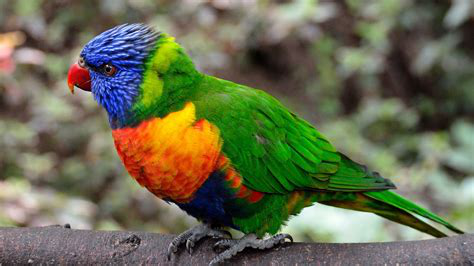

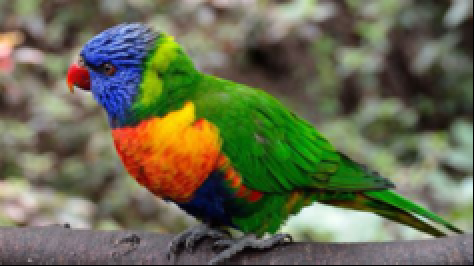

In [10]:
image = Image.open("parrot.jpeg")
lowpass = PIL.Image.new(image.mode, image.size)
y = 1

while(y<image.width-1):
    x = 1
    while(x<image.height-1):
        ravg = image.getpixel((y-1,x-1))[0] + image.getpixel((y - 1,x))[0] + image.getpixel((y-1,x+1))[0] + image.getpixel((y,x-1))[0] + image.getpixel((y,x))[0] + image.getpixel((y,x+1))[0] + image.getpixel((y+1,x-1))[0] + image.getpixel((y+1,x))[0] + image.getpixel((y+1,x+1))[0]
        gavg = image.getpixel((y-1,x-1))[1] + image.getpixel((y - 1,x))[1] + image.getpixel((y-1,x+1))[1] + image.getpixel((y,x-1))[1] + image.getpixel((y,x))[1] + image.getpixel((y,x+1))[1] + image.getpixel((y+1,x-1))[1] + image.getpixel((y+1,x))[1] + image.getpixel((y+1,x+1))[1]
        bavg = image.getpixel((y-1,x-1))[2] + image.getpixel((y - 1,x))[2] + image.getpixel((y-1,x+1))[2] + image.getpixel((y,x-1))[2] + image.getpixel((y,x))[2] + image.getpixel((y,x+1))[2] + image.getpixel((y+1,x-1))[2] + image.getpixel((y+1,x))[2] + image.getpixel((y+1,x+1))[2]
        ravg = ravg/9
        gavg = gavg/9
        bavg = bavg/9
        ravg = int(round(ravg))
        gavg = int(round(gavg))
        bavg = int(round(bavg))
        lowpass.putpixel((y-1,x-1),(ravg,gavg,bavg))
        lowpass.putpixel((y-1,x),(ravg,gavg,bavg))
        lowpass.putpixel((y-1,x+1),(ravg,gavg,bavg))
        lowpass.putpixel((y,x-1),(ravg,gavg,bavg))
        lowpass.putpixel((y,x),(ravg,gavg,bavg))
        lowpass.putpixel((y,x+1),(ravg,gavg,bavg))
        lowpass.putpixel((y+1,x-1),(ravg,gavg,bavg))
        lowpass.putpixel((y+1,x),(ravg,gavg,bavg))
        lowpass.putpixel((y+1,x+1),(ravg,gavg,bavg))
        x = x+2
    y = y+2
display(image)
display(lowpass)

# Q10
Load the given input inage, Ignore the border pixel and apply high pass mask to each and every

pixel. Display the o/p image. Also, Show that high pass= Original – low pass.
Note: Use the given input image of Experiment No.3.

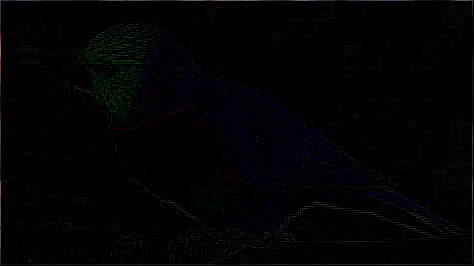

In [11]:
kernel = [[-1/9,-1/9,-1/9],[-1/9,8/9,-1/9],[-1/9,-1/9,-1/9]]
image = Image.open("blurparrot.jpeg")
highpass = PIL.Image.new(image.mode, image.size)
for y in range(image.width):
    for x in range(image.height):
        if(x == 0 and y == 0):
            resr = image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y,x+1))[0] * kernel[1][2] + image.getpixel((y+1,x))[0] * kernel[2][1] + image.getpixel((y+1,x+1))[0] * kernel[2][2]
            resg = image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y,x+1))[1] * kernel[1][2] + image.getpixel((y+1,x))[1] * kernel[2][1] + image.getpixel((y+1,x+1))[1] * kernel[2][2]
            resb = image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y,x+1))[2] * kernel[1][2] + image.getpixel((y+1,x))[2] * kernel[2][1] + image.getpixel((y+1,x+1))[2] * kernel[2][2]
        elif(x == 0 and y == image.width - 1):
            resr = image.getpixel((y-1,x))[0] * kernel[1][0] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y-1,x+1))[0] * kernel[2][0] + image.getpixel((y,x+1))[0] * kernel[2][1]
            resg = image.getpixel((y-1,x))[1] * kernel[1][0] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y-1,x+1))[1] * kernel[2][0] + image.getpixel((y,x+1))[1] * kernel[2][1]
            resb = image.getpixel((y-1,x))[2] * kernel[1][0] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y-1,x+1))[2] * kernel[2][0] + image.getpixel((y,x+1))[2] * kernel[2][1]
        elif(x == image.height-1 and y == 0):
            resr = image.getpixel((y,x-1))[0] * kernel[0][1] + image.getpixel((y+1,x-1))[0] * kernel[0][2] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y+1,x))[0] * kernel[1][2]
            resg = image.getpixel((y,x-1))[1] * kernel[0][1] + image.getpixel((y+1,x-1))[1] * kernel[0][2] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y+1,x))[1] * kernel[1][2]
            resb = image.getpixel((y,x-1))[2] * kernel[0][1] + image.getpixel((y+1,x-1))[2] * kernel[0][2] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y+1,x))[2] * kernel[1][2]
        elif(x == image.height-1 and y == image.width - 1):
            resr = image.getpixel((y-1,x-1))[0] * kernel[0][0] + image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y,x-1))[0] * kernel[1][0] + image.getpixel((y,x))[0] * kernel[1][1]
            resg = image.getpixel((y-1,x-1))[1] * kernel[0][0] + image.getpixel((y-1,x))[1] * kernel[0][1] + image.getpixel((y,x-1))[1] * kernel[1][0] + image.getpixel((y,x))[1] * kernel[1][1]
            resb = image.getpixel((y-1,x-1))[2] * kernel[0][0] + image.getpixel((y-1,x))[2] * kernel[0][1] + image.getpixel((y,x-1))[2] * kernel[1][0] + image.getpixel((y,x))[2] * kernel[1][1]
        elif(y == 0):
            resr = image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y-1,x+1))[0] * kernel[0][2] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y,x+1))[0] * kernel[1][2] + image.getpixel((y+1,x))[0] * kernel[2][1] + image.getpixel((y+1,x+1))[0] * kernel[2][2]
            resg = image.getpixel((y-1,x))[1] * kernel[0][1] + image.getpixel((y-1,x+1))[1] * kernel[0][2] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y,x+1))[1] * kernel[1][2] + image.getpixel((y+1,x))[1] * kernel[2][1] + image.getpixel((y+1,x+1))[1] * kernel[2][2]
            resb = image.getpixel((y-1,x))[2] * kernel[0][1] + image.getpixel((y-1,x+1))[2] * kernel[0][2] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y,x+1))[2] * kernel[1][2] + image.getpixel((y+1,x))[2] * kernel[2][1] + image.getpixel((y+1,x+1))[2] * kernel[2][2]
        elif(x == 0):
            resr = image.getpixel((y,x-1))[0] * kernel[1][0] + image.getpixel((y+1,x-1))[0] * kernel[2][0] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y,x+1))[0] * kernel[1][2] + image.getpixel((y+1,x))[0] * kernel[2][1] + image.getpixel((y+1,x+1))[0] * kernel[2][2]
            resg = image.getpixel((y,x-1))[1] * kernel[1][0] + image.getpixel((y+1,x-1))[1] * kernel[2][0] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y,x+1))[1] * kernel[1][2] + image.getpixel((y+1,x))[1] * kernel[2][1] + image.getpixel((y+1,x+1))[1] * kernel[2][2]
            resb = image.getpixel((y,x-1))[2] * kernel[1][0] + image.getpixel((y+1,x-1))[2] * kernel[2][0] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y,x+1))[2] * kernel[1][2] + image.getpixel((y+1,x))[2] * kernel[2][1] + image.getpixel((y+1,x+1))[2] * kernel[2][2]
        elif(x == image.height-1):
            resr = image.getpixel((y-1,x-1))[0] * kernel[0][0] + image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y,x-1))[0] * kernel[1][0] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y+1,x-1))[0] * kernel[0][2] + image.getpixel((y+1,x))[0] * kernel[1][2]
            resg = image.getpixel((y-1,x-1))[1] * kernel[0][0] + image.getpixel((y-1,x))[1] * kernel[0][1] + image.getpixel((y,x-1))[1] * kernel[1][0] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y+1,x-1))[1] * kernel[0][2] + image.getpixel((y+1,x))[1] * kernel[1][2]
            resb = image.getpixel((y-1,x-1))[2] * kernel[0][0] + image.getpixel((y-1,x))[2] * kernel[0][1] + image.getpixel((y,x-1))[2] * kernel[1][0] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y+1,x-1))[2] * kernel[0][2] + image.getpixel((y+1,x))[2] * kernel[1][2]
        elif(y == image.width-1):
            resr = image.getpixel((y-1,x))[0] * kernel[1][0] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y-1,x+1))[0] * kernel[2][0] + image.getpixel((y,x+1))[0] * kernel[2][1] +  image.getpixel((y-1,x-1))[0] * kernel[0][0] +  image.getpixel((y,x-1))[0] * kernel[0][1]
            resg = image.getpixel((y-1,x))[1] * kernel[1][0] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y-1,x+1))[1] * kernel[2][0] + image.getpixel((y,x+1))[1] * kernel[2][1] +  image.getpixel((y-1,x-1))[1] * kernel[0][0] +  image.getpixel((y,x-1))[0] * kernel[0][1]
            resb = image.getpixel((y-1,x))[2] * kernel[1][0] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y-1,x+1))[2] * kernel[2][0] + image.getpixel((y,x+1))[2] * kernel[2][1] +  image.getpixel((y-1,x-1))[2] * kernel[0][0] +  image.getpixel((y,x-1))[0] * kernel[0][1]
        else:
            resr = image.getpixel((y,x-1))[0] * kernel[1][0] + image.getpixel((y,x))[0] * kernel[1][1] + image.getpixel((y+1,x-1))[0] * kernel[2][0] + image.getpixel((y+1,x))[0] * kernel[2][1] +  image.getpixel((y-1,x-1))[0] * kernel[0][0] +  image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y-1,x+1))[0] * kernel[0][2] + image.getpixel((y,x+1))[0] * kernel[1][2] + image.getpixel((y+1,x+1))[0] * kernel[2][2]
            resg = image.getpixel((y,x-1))[1] * kernel[1][0] + image.getpixel((y,x))[1] * kernel[1][1] + image.getpixel((y+1,x-1))[1] * kernel[2][0] + image.getpixel((y+1,x))[1] * kernel[2][1] +  image.getpixel((y-1,x-1))[1] * kernel[0][0] +  image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y-1,x+1))[1] * kernel[0][2] + image.getpixel((y,x+1))[1] * kernel[1][2] + image.getpixel((y+1,x+1))[1] * kernel[2][2]
            resb = image.getpixel((y,x-1))[2] * kernel[1][0] + image.getpixel((y,x))[2] * kernel[1][1] + image.getpixel((y+1,x-1))[2] * kernel[2][0] + image.getpixel((y+1,x))[2] * kernel[2][1] +  image.getpixel((y-1,x-1))[2] * kernel[0][0] +  image.getpixel((y-1,x))[0] * kernel[0][1] + image.getpixel((y-1,x+1))[2] * kernel[0][2] + image.getpixel((y,x+1))[2] * kernel[1][2] + image.getpixel((y+1,x+1))[2] * kernel[2][2]
        resr = int(round(resr))
        resb = int(round(resb))
        resg = int(round(resg))
        highpass.putpixel((y,x),(resr,resb,resg))
display(highpass)

In [ ]:
import PIL
from PIL import Image
loc1="cameraman.tif"
loc2="saturn.png"
img1=Image.open(loc1)
img2=Image.open(loc2)
#display(img)
def p(img):
    planes=[]
    width,height=img.size
    for k in range(8):
        plane=PIL.Image.new(img.mode, img.size)
        for i in range(height):
            for j in range(width):
                r=img.getpixel((j,i))[0]
                num=r>>k
                if ((num&1)!=0):
                    plane.putpixel((j,i),(255,255,255))
                else:
                    plane.putpixel((j,i),(0,0,0))
        planes.append(plane)
    for i in range(8):
        display(planes[i])
p(img1)
p(img2)